<a href="https://colab.research.google.com/github/Crestfallen04/PropertyPriceEstimator/blob/main/LeadScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Lybraries and upload file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import pickle
import json

In [3]:
from google.colab import files
uploaded=files.upload()

In [4]:
data=pd.read_csv('Data_Science_Internship - Dump.csv')

In [5]:
data.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


#Data Wrangling

In [6]:
data.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [7]:
data=data.drop(['lost_reason','lead_id'],axis=1)

In [8]:
data.shape

(46608, 14)

In [9]:
data.isnull().sum()

Unnamed: 0            0
Agent_id              0
status                0
budget             3700
lease              2341
movein            13638
source                0
source_city           0
source_country        0
utm_source            0
utm_medium            0
des_city              0
des_country           0
room_type         23547
dtype: int64

In [9]:
data=data.drop(['room_type','movein'],axis=1)

In [10]:
data=data.drop(['Agent_id'],axis=1)

In [11]:
data=data.drop(['source', 'source_city', 'source_country', 'utm_source', 'utm_medium', 'des_city', 'des_city', 'des_country'],axis=1)

## Feature Engineering and Outlier Detection

###status

In [15]:
data['status'].unique()

array(['LOST', 'WON', None], dtype=object)

Text(0, 0.5, 'Count')

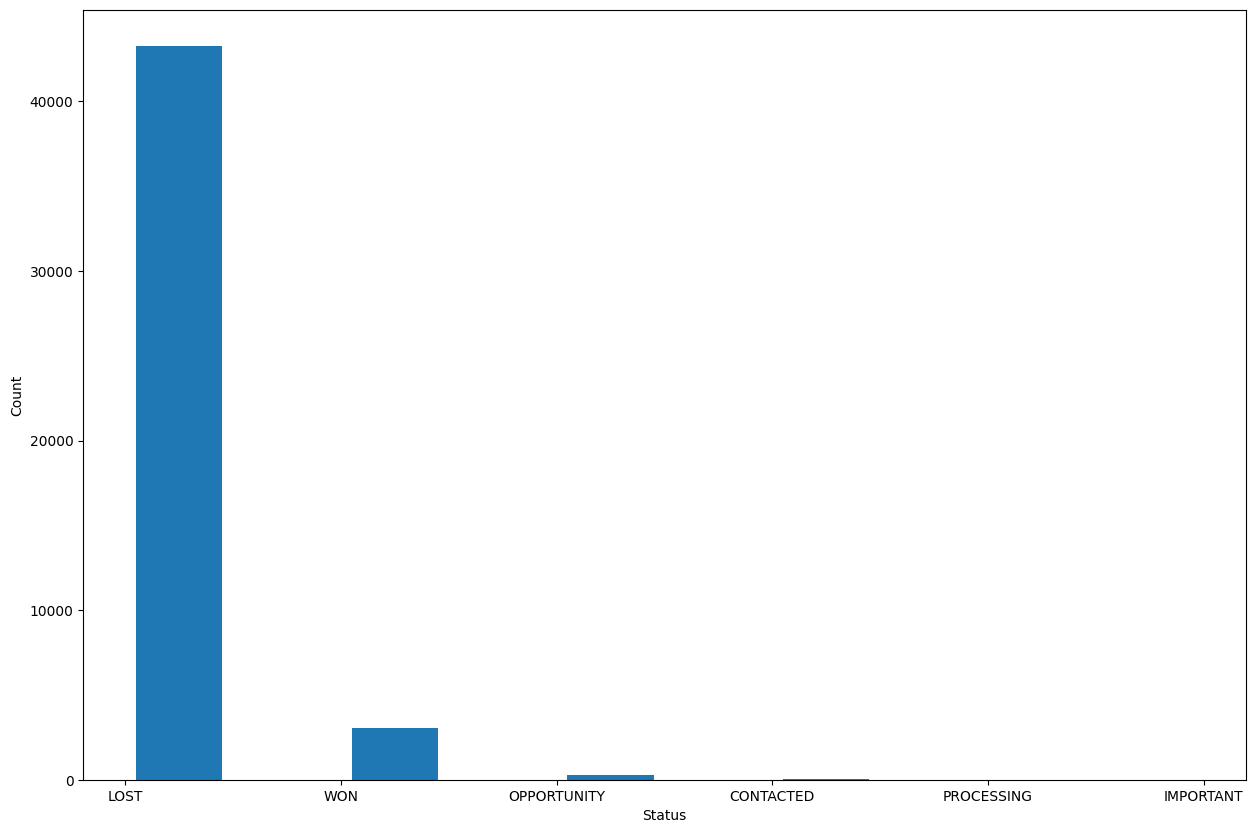

In [13]:
plt.rcParams['figure.figsize']=(15,10)
plt.hist(data.status,rwidth=.8)
plt.xlabel('Status', fontsize=10)
plt.ylabel('Count', fontsize=10)

In [14]:
data['status']=data['status'].apply(lambda x: x if x in ['LOST','WON'] else(None))

###budget

In [16]:
data['budget'].nunique()

1857

In [17]:
df1=pd.DataFrame(data['budget'].unique())
df1.head()

,0
0,NaN
1,£121 - £180 Per Week
2,0-0
3,120
4,£181 - £240 Per Week


In [ ]:
def transform_data(data):
  df2=pd.DataFrame()
  li=[]
  for i in data['budget']:
      try:
          li.append(str(int(i)))
      except:
          continue
  return li

In [ ]:
li1=transform_data(data)

In [ ]:
len(li1)

11809

In [ ]:
def transform_data2(df):
  li=[]
  for i in df['budget']:
     if "week" in str(i):
       li.append(i)
     elif "Week" in str(i):
       li.append(i)
     elif "pw" in str(i):
       li.append(i)
     elif "p/w" in str(i):
       li.append(i)
     elif "WEEK" in str(i):
       li.append(i)
  return li

In [ ]:
li2=transform_data2(data)

In [ ]:
li2

['£121 - £180 Per Week',
 '£181 - £240 Per Week',
 '£121 - £180 Per Week',
 '£121 - £180 Per Week',
 '£181 - £240 Per Week',
 '£60 - £120 Per week',
 '£60 - £120 Per week',
 '£60 - £120 Per week',
 '£60 - £120 Per week',
 '£60 - £120 Per week',
 '£181 - £240 Per Week',
 '£180 Per week',
 '£60 - £120 Per week',
 '£181 - £240 Per Week',
 '130-150/week',
 '£181 - £240 Per Week',
 '£121 - £180 Per Week',
 '£60 - £120 Per week',
 '350/week',
 '£60 - £120 Per week',
 '£60 - £120 Per week',
 '£60 - £120 Per week',
 '£60 - £120 Per week',
 '£60 - £120 Per week',
 '£181 - £240 Per Week',
 '£60 - £120 Per week',
 '> 300£ Per Week',
 '£121 - £180 Per Week',
 '£121 - £180 Per Week',
 '£60 - £120 Per week',
 '£60 - £120 Per week',
 '£121 - £180 Per Week',
 '£181 - £240 Per Week',
 '£60 - £120 Per week',
 '£60 - £120 Per week',
 '£121 - £180 Per Week',
 '£60 - £120 Per week',
 '£121 - £180 Per Week',
 '£60 - £120 Per week',
 '£60 - £120 Per week',
 '£181 - £240 Per Week',
 '£121 - £180 Per Week',
 '

In [ ]:
len(li2)

23297

In [ ]:
df2=pd.DataFrame(li2)

In [ ]:
df2

,0
0,£121 - £180 Per Week
1,£181 - £240 Per Week
2,£121 - £180 Per Week
3,£121 - £180 Per Week
4,£181 - £240 Per Week
...,...
23292,£121 - £180 Per Week
23293,£60 - £120 Per week
23294,£60 - £120 Per week
23295,£241 - £300 Per week


In [ ]:
df2[0].unique()

array(['£121 - £180 Per Week', '£181 - £240 Per Week',
       '£60 - £120 Per week', '£180 Per week', '130-150/week', '350/week',
       '> 300£ Per Week', '175-180pw', '100-120 pounds per week',
       '£241 - £300 Per week', '160-180pw', '100-200 pw', '400pw',
       '100 pounds per week', '200-240/week', '>210/week', '100/week',
       '125pounds / week', '120 pw -151 pw', '145/week', '150 Per Week',
       '200/week', '£150 Per Week', '500/week', '140 pw', '£175/Per Week',
       '170 Per Week', '300pw', '120 per week', '£50 Per Week', '350 pw',
       '£250 Per Week', '£60 - £150 Per week', '120/week',
       '£115 Per week', '200pw', '250 per weeks', '180/week', '180 pw',
       '150/WEEK', '0-Per week or per month?', '300£ Per Week',
       '300/week', '150 pw', '120-130/week', '150- 200 pw', '160/week',
       '100 - 150/week', '95 pound Per week', '250/week', '160pw',
       '£100- £120 Per week', '275 pounds per week', '250-300/week',
       '190pw', '110-130/week', '180 Per 

In [ ]:
def transform_data3(df):
  li=[]
  for i in df['budget']:
     if "month" in str(i):
       li.append(1)
     elif "Month" in str(i):
       li.append(1)
     elif "pm" in str(i):
       li.append(1)
     elif "p/m" in str(i):
       li.append(1)
  return li

In [ ]:
li3=transform_data3(data)

In [ ]:
len(li3)

202

In [ ]:
def transform_data4(df):
  li=[]
  for i in df['budget']:
     if "week" in str(i):
            continue
     elif "Week" in str(i):
            continue
     elif "pw" in str(i):
            continue
     elif "p/w" in str(i):
            continue
     elif "Month" in str(i):
            continue
     elif "month" in str(i):
            continue
     elif "pm" in str(i):
            continue
     elif "p/m" in str(i):
            continue
     elif "week" in str(i):
            continue
     elif "-" in str(i):
            continue
     else:
       li.append(i)
  return li

In [ ]:
li4=transform_data4(data)

In [ ]:
len(li4)

15658

In [ ]:
li5=[i for i in li4 if i not in li1]

In [ ]:
len(li5)

3849

In [ ]:
'nan' in li5

False

In [ ]:
df2=pd.DataFrame(li5)

In [ ]:
df2

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3844,NaN
3845,NaN
3846,NaN
3847,NaN


In [ ]:
df2[0].unique()

array([nan, 'no budget yet .', '500 pcm', 'no budget', 'flexible', '£900',
       '400PPM', '£260', 'ensuite', '150/WEEK', '55£', '400 pcm', '165/',
       '500pounds', 'low', '7000 pounds', 'lowest', '£186', '£100', '90£',
       '400 m', '100 pounds', '700 to 900', 'Not specified', '450 pcm',
       '£175', 'Middlesbrough', '£180', '£300', 'okay with 250',
       '200 pound', 'na', 'not sure', '190/WEEK', '£200', '150\\',
       '800PPM', '1000 pcm', '£150', 'less than 100', '300/WEEK',
       '800 pcm', '£160', '350 pcm', '280PPW', '900 pcm', '1000cad',
       '600pcm', '100/WEEK', '250 pounds', '£110', '430 for 2 bedroom',
       '120 pounds', '700 pcm', '165 MAX', '250\\', '700pcm',
       '500/600 pcm', '400/WEEK', '370/w', '700PPM', 'cheapest', 'tbd',
       '75/WEEK', '500 PM', '550 pcm', '>300', 'not budget yet',
       '250 max', 'tbh', 'studio', '165/170', '£241', '£80', '160 pounds',
       '600 pcm', '100 Gbpo max', 'no idea', '150PPW', '70 pounds',
       'low budget', 'n

In [ ]:
def transform_data5(df):
  li=[]
  for i in df['budget']:
    if "-" in str(i):
         li.append(i)
  return li

In [ ]:
li6=transform_data5(data)

In [ ]:
len(li6)

29499

In [ ]:
li7=[i for i in li6 if i not in li2]

In [ ]:
len(li7)

7515

In [ ]:
def transform_data6(df):
  li=[]
  for i in df['budget']:
    if "$" in str(i):
         li.append(i)
  return li

In [ ]:
li8=transform_data6(data)

In [ ]:
len(li8)

20

In [ ]:
li9=[i for i in li8 if i not in li2]

In [ ]:
len(li9)

1

In [18]:
import re

In [19]:
def convert_budget(y):
    x=str(y)
    se1=re.search(r'(Week|week|WEEK)',x)
    if se1 != None:
      a=re.findall(r'(\d{4}|\d{3}|\d{2}|\d{1})',x)
      if len(a)==1:
        return int(a[0])
      elif len(a) >=2:
        v1=int(a[0])
        v2=int(a[-1])
        v3=int((v1+v2)/2)
        return v3
      else:
        return None
    else:
      se2=re.search(r'-',x)
      se3=re.search(r'm',x)
      if se2 != None and se3== None:
        a=re.findall(r'(\d{4}|\d{3}|\d{2}|\d{1})',x)
        if len(a)==1:
          return int(a[0])
        elif len(a) >=2:
          v1=int(a[0])
          v2=int(a[-1])
          v3=int((v1+v2)/2)
          return v3
        else:
          return None
      else:
        se3=re.search(r'm',x)
        if se3 == None:
          a=re.findall(r'(\d{4}|\d{3}|\d{2}|\d{1})',x)
          if len(a)>0:
            return int(a[0])
          else:
            return None
        else:
          return None

In [20]:
data['budget'].tail(30)

46578                    1080
46579                     0-0
46580         > 300£ Per Week
46581                     NaN
46582                     NaN
46583    £121 - £180 Per Week
46584     £60 - £120 Per week
46585                     0-0
46586    £121 - £180 Per Week
46587    £121 - £180 Per Week
46588    £121 - £180 Per Week
46589                     0-0
46590    £121 - £180 Per Week
46591                     215
46592     £60 - £120 Per week
46593                     0-0
46594    £121 - £180 Per Week
46595                    1858
46596               0-500 PCM
46597    £121 - £180 Per Week
46598     £60 - £120 Per week
46599     £60 - £120 Per week
46600                     0-0
46601                    1529
46602    £121 - £180 Per Week
46603     £60 - £120 Per week
46604     £60 - £120 Per week
46605    £241 - £300 Per week
46606                    1108
46607    £181 - £240 Per Week
Name: budget, dtype: object

In [21]:
df3=pd.DataFrame(data['budget'].apply(convert_budget))

In [22]:
df3

,budget
0,NaN
1,NaN
2,150.0
3,0.0
4,NaN
...,...
46603,90.0
46604,90.0
46605,270.0
46606,1108.0


In [23]:
df3.isnull().sum()

budget    4080
dtype: int64

In [24]:
df3.max()

budget    7000.0
dtype: float64

Text(0, 0.5, 'Count')

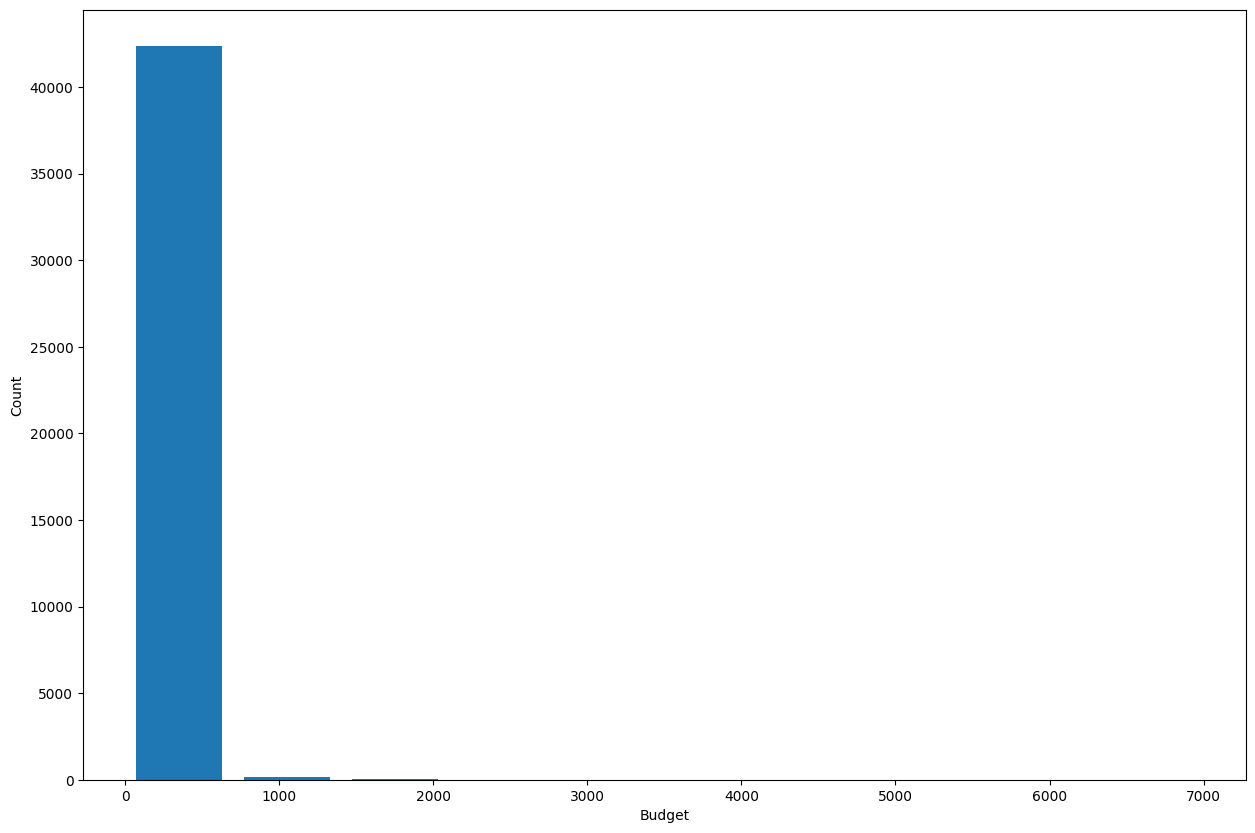

In [27]:
plt.rcParams['figure.figsize']=(15,10)
plt.hist(df3.budget,rwidth=.8)
plt.xlabel('Budget', fontsize=10)
plt.ylabel('Count', fontsize=10)

In [269]:
df3['budget']=df3['budget'].apply(lambda x: x if x<=1000 else(None))

In [81]:
df3.isnull().sum()

budget    4174
dtype: int64

In [82]:
df3.max()

budget    1000.0
dtype: float64

Text(0, 0.5, 'Count')

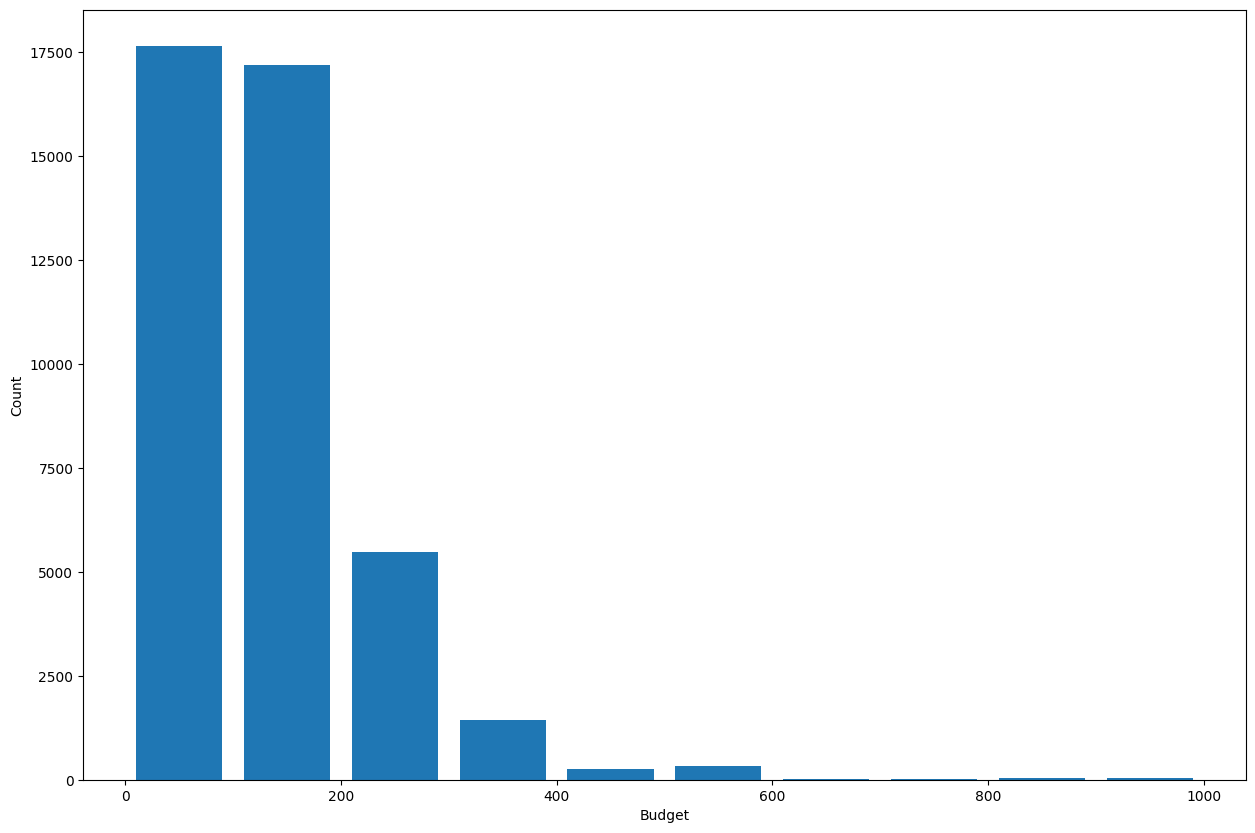

In [83]:
plt.rcParams['figure.figsize']=(15,10)
plt.hist(df3.budget,rwidth=.8)
plt.xlabel('Budget', fontsize=10)
plt.ylabel('Count', fontsize=10)

In [25]:
df3['budget']=df3['budget'].apply(lambda x: x if x<=600 else(None))

In [26]:
df3.isnull().sum()

budget    4279
dtype: int64

In [27]:
df3.max()

budget    600.0
dtype: float64

Text(0, 0.5, 'Count')

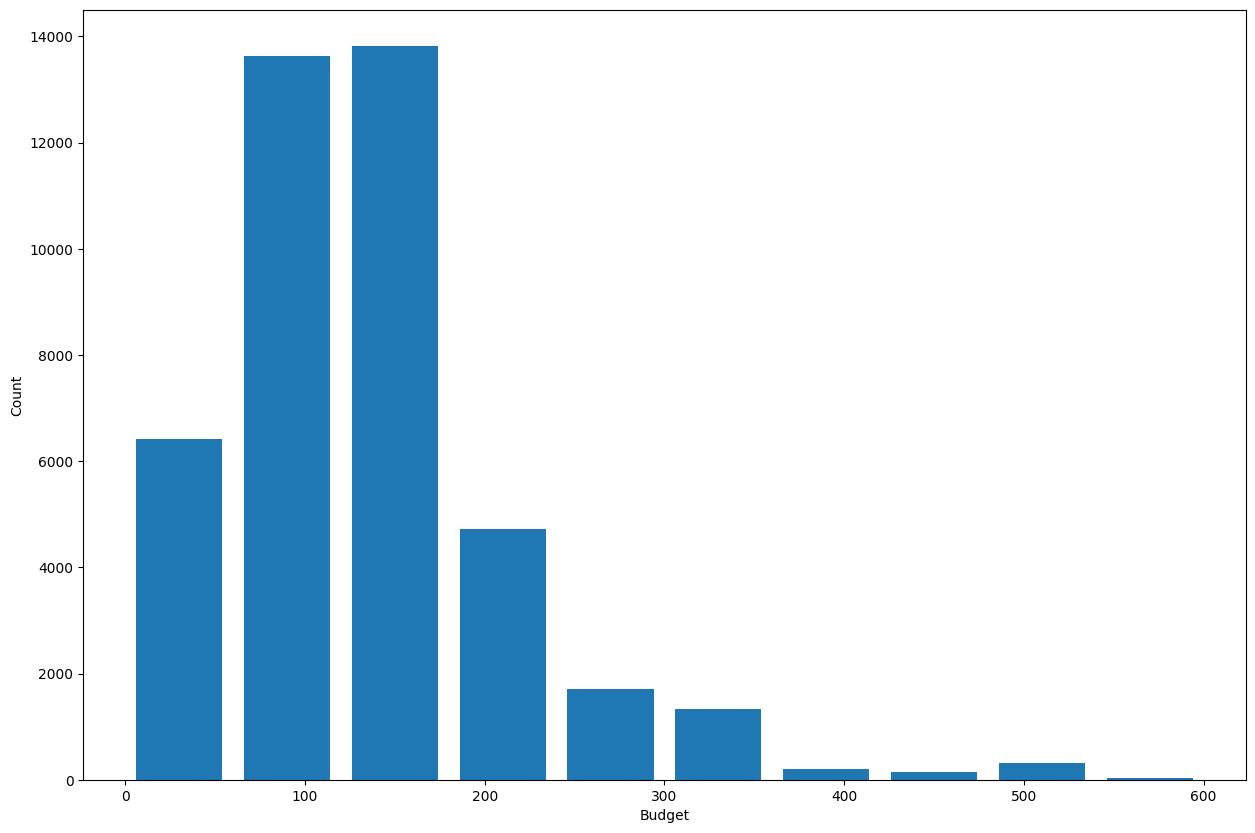

In [28]:
plt.rcParams['figure.figsize']=(15,10)
plt.hist(df3.budget,rwidth=.8)
plt.xlabel('Budget', fontsize=10)
plt.ylabel('Count', fontsize=10)

In [29]:
data['budget']=df3['budget']

In [30]:
data.isnull().sum()

Unnamed: 0       0
status         291
budget        4279
lease         2341
dtype: int64

In [31]:
data.head(20)

,Unnamed: 0,status,budget,lease
0,0,LOST,NaN,NaN
1,1,LOST,NaN,NaN
2,2,LOST,150.0,Full Year Course Stay 40 - 44 weeks
3,3,LOST,0.0,0
4,4,LOST,NaN,NaN
5,5,LOST,120.0,semester-stay
6,6,LOST,0.0,0
7,7,LOST,210.0,51
8,8,LOST,100.0,Semester Stay 20 - 24 weeks
9,9,LOST,270.0,51


In [32]:
data.shape

(46608, 4)

### lease

In [33]:
data['lease'].unique()

array([nan, 'Full Year Course Stay 40 - 44 weeks', '0', 'semester-stay',
       '51', 'Semester Stay 20 - 24 weeks',
       'Complete Education Year Stay 50 - 52 weeks', 'full-course-stay',
       'full-year-stay', 'Other', '51 weeks', '44', '18',
       'full year stay', '51weeks', 'Summer/Short Stay 8 - 12 weeks',
       '51 weeks \\', 'other', 'short-stay', '52 weeks', '44 weeks', '12',
       '1 year', '96', '43', '20', '294', '20 - 24 weeks', '1 year .',
       '48', '40', 'N51', '6', 'Academic year', '8', '51Weeks',
       '50 weeks', '84', '15 weeks', 'full course', '45', '39', '1',
       '5 weeks', '50', '12-24', '25', '45 weeks', '19', '44-51',
       '6 weeks', 'FULL YEAR', '24-36', '32', '44/week', '42', '3 month',
       '44-51 weeks', '3 months', '24', '6 months', '2 years', '10', '52',
       '2 weeks', '46', 'sem stay', '13', 'lease', 'short stay', '4',
       '52weeks', '69', '16', '50 - 52 weeks', '44 - 51 weeks',
       '4-8 weeks', '4 weeks', '3', 'Full year stay', 

In [136]:
def transform_lease1(df):
  li=[]
  for i in df['lease']:
     if "year" in str(i):
       li.append(i)
     elif "Year" in str(i):
       li.append(i)
     elif "YEAR" in str(i):
       li.append(i)
     elif "yr" in str(i):
       li.append(i)
     elif "FULL" in str(i):
       li.append(i)
     elif "Full" in str(i):
       li.append(i)
     elif "full" in str(i):
       li.append(i)
  return li

In [137]:
li1=transform_lease1(data)

In [138]:
li1

['Full Year Course Stay 40 - 44 weeks',
 'Full Year Course Stay 40 - 44 weeks',
 'Full Year Course Stay 40 - 44 weeks',
 'Complete Education Year Stay 50 - 52 weeks',
 'full-course-stay',
 'full-course-stay',
 'full-year-stay',
 'Full Year Course Stay 40 - 44 weeks',
 'Complete Education Year Stay 50 - 52 weeks',
 'Full Year Course Stay 40 - 44 weeks',
 'Complete Education Year Stay 50 - 52 weeks',
 'Complete Education Year Stay 50 - 52 weeks',
 'Full Year Course Stay 40 - 44 weeks',
 'Full Year Course Stay 40 - 44 weeks',
 'Complete Education Year Stay 50 - 52 weeks',
 'Complete Education Year Stay 50 - 52 weeks',
 'Full Year Course Stay 40 - 44 weeks',
 'full year stay',
 'full-course-stay',
 'Full Year Course Stay 40 - 44 weeks',
 'Complete Education Year Stay 50 - 52 weeks',
 'Complete Education Year Stay 50 - 52 weeks',
 'Full Year Course Stay 40 - 44 weeks',
 'Full Year Course Stay 40 - 44 weeks',
 'Complete Education Year Stay 50 - 52 weeks',
 'Full Year Course Stay 40 - 44 week

In [139]:
len(li1)

20068

In [140]:
def transform_lease2(df):
  li=[]
  for i in df['lease']:
     if "semester" in str(i):
       li.append(i)
     elif "Semester" in str(i):
       li.append(i)
     elif "sem" in str(i):
       li.append(i)
     elif "Sem" in str(i):
       li.append(i)
     elif "SEMESTER" in str(i):
       li.append(i)
  return li

In [141]:
li2=transform_lease2(data)

In [142]:
len(li2)

3253

In [149]:
def transform_lease3(df):
  li=[]
  for i in df['lease']:
     if "short" in str(i):
       li.append(i)
     elif "Short" in str(i):
       li.append(i)
     elif "summer" in str(i):
       li.append(i)
     elif "Summer" in str(i):
       li.append(i)
     elif "SHORT" in str(i):
       li.append(i)
  return li

In [150]:
li3=transform_lease3(data)

In [151]:
len(li3)

2714

In [152]:
def transform_lease4(df):
  li=[]
  for i in df['lease']:
     if "week" in str(i):
       li.append(i)
     elif "Week" in str(i):
       li.append(i)
     elif "pw" in str(i):
       li.append(i)
     elif "p/w" in str(i):
       li.append(i)
     elif "WEEK" in str(i):
       li.append(i)
  return li

In [165]:
li4=transform_lease4(data)

In [166]:
len(li4)

23862

In [167]:
li4=[i for i in li4 if i not in li2 and i not in li1]

In [168]:
li4

['51 weeks',
 '51 weeks',
 '51 weeks',
 '51 weeks',
 '51weeks',
 'Summer/Short Stay 8 - 12 weeks',
 'Summer/Short Stay 8 - 12 weeks',
 '51 weeks \\',
 '51 weeks',
 'Summer/Short Stay 8 - 12 weeks',
 '51 weeks',
 '52 weeks',
 '51 weeks',
 '44 weeks',
 'Summer/Short Stay 8 - 12 weeks',
 'Summer/Short Stay 8 - 12 weeks',
 'Summer/Short Stay 8 - 12 weeks',
 'Summer/Short Stay 8 - 12 weeks',
 'Summer/Short Stay 8 - 12 weeks',
 'Summer/Short Stay 8 - 12 weeks',
 'Summer/Short Stay 8 - 12 weeks',
 'Summer/Short Stay 8 - 12 weeks',
 'Summer/Short Stay 8 - 12 weeks',
 'Summer/Short Stay 8 - 12 weeks',
 'Summer/Short Stay 8 - 12 weeks',
 '20 - 24 weeks',
 'Summer/Short Stay 8 - 12 weeks',
 '44 weeks',
 'Summer/Short Stay 8 - 12 weeks',
 '52 weeks',
 'Summer/Short Stay 8 - 12 weeks',
 '51Weeks',
 '50 weeks',
 '51 weeks',
 'Summer/Short Stay 8 - 12 weeks',
 'Summer/Short Stay 8 - 12 weeks',
 '15 weeks',
 'Summer/Short Stay 8 - 12 weeks',
 'Summer/Short Stay 8 - 12 weeks',
 'Summer/Short Stay 8 - 1

In [169]:
li5=[i for i in li4 if i not in li3 ]

In [170]:
li5

['51 weeks',
 '51 weeks',
 '51 weeks',
 '51 weeks',
 '51weeks',
 '51 weeks \\',
 '51 weeks',
 '51 weeks',
 '52 weeks',
 '51 weeks',
 '44 weeks',
 '20 - 24 weeks',
 '44 weeks',
 '52 weeks',
 '51Weeks',
 '50 weeks',
 '51 weeks',
 '15 weeks',
 '51 weeks',
 '5 weeks',
 '44 weeks',
 '51 weeks',
 '51 weeks',
 '52 weeks',
 '51 weeks',
 '44 weeks',
 '51 weeks',
 '45 weeks',
 '51 weeks',
 '6 weeks',
 '51 weeks',
 '44/week',
 '51 weeks',
 '51 weeks',
 '51 weeks',
 '51 weeks',
 '51 weeks',
 '44-51 weeks',
 '44 weeks',
 '51weeks',
 '51 weeks',
 '2 weeks',
 '52 weeks',
 '51 weeks',
 '51 weeks',
 '44 weeks',
 '51 weeks',
 '51 weeks',
 '44 weeks',
 '51 weeks',
 '51 weeks',
 '51 weeks',
 '51 weeks',
 '44 weeks',
 '52weeks',
 '51 weeks',
 '20 - 24 weeks',
 '44 weeks',
 '44 weeks',
 '50 - 52 weeks',
 '51 weeks',
 '44 - 51 weeks',
 '44 weeks',
 '51 weeks',
 '51 weeks',
 '4-8 weeks',
 '44 weeks',
 '44 weeks',
 '4 weeks',
 '51 weeks',
 '44 weeks',
 '51 weeks',
 '51 weeks',
 '44 weeks',
 '51 weeks',
 '51 we

In [171]:
len(li5)

1186

In [172]:
def transform_lease5(data):
  li=[]
  for i in data['lease']:
      try:
          li.append(str(int(i)))
      except:
          continue
  return li

In [175]:
li6=transform_lease5(data)

In [176]:
li6

['0',
 '0',
 '51',
 '51',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '51',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '51',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '44',
 '18',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '51',
 '0',
 '0',
 '0',
 '0',
 '0',
 '51',
 '0',
 '0',
 '51',
 '0',
 '0',
 '0',
 '0',
 '51',
 '0',
 '12',
 '0',
 '0',
 '0',
 '44',
 '0',
 '51',
 '44',
 '0',
 '51',
 '51',
 '96',
 '51',
 '43',
 '51',
 '0',
 '0',
 '51',
 '20',
 '0',
 '44',
 '51',
 '51',
 '0',
 '0',
 '51',
 '51',
 '0',
 '0',
 '0',
 '51',
 '294',
 '0',
 '0',
 '0',
 '51',
 '0',
 '51',
 '51',
 '51',
 '0',
 '48',
 '0',
 '0',
 '0',
 '0',
 '51',
 '0',
 '0',
 '40',
 '0',
 '0',
 '0',
 '51',
 '44',
 '6',
 '0',
 '44',
 '51',
 '0',
 '51',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '51',
 '6',
 '0',
 '51',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '8',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '51',
 '0',
 '0',
 '0',
 '0',
 '51',
 '0',
 '0',
 '0',
 '0',
 '0',
 '51',
 '0',
 '0',

In [177]:
len(li6)

14015

In [34]:
def convert_lease(y):
    x=str(y)
    se1=re.search(r'(Year|year|YEAR|yr|Full|FULL|full)',x)
    if se1 != None:
        a=re.findall(r'(\d{4}|\d{3}|\d{2}|\d{1})',x)
        if len(a)>0:
          v=int(a[-1])
          return v
        else:
          return 50
    else:
      se2=re.search(r'(Semester|semester|SEMESTER|Sem|sem|SEM)',x)
      if se2 != None:
              a=re.findall(r'(\d{4}|\d{3}|\d{2}|\d{1})',x)
              if len(a)>0:
                v=int(a[-1])
                return v
              else:
                return 24
      else:
        se3=re.search(r'(Short|short|SHORT|Summer|summer|SUMMER)',x)
        if se3 != None:
            a=re.findall(r'(\d{4}|\d{3}|\d{2}|\d{1})',x)
            if len(a)>0:
                v=int(a[-1])
                return v
            else:
                return 12
        else:
           se4=re.search(r'(Week|week|WEEK|pw|p/w)',x)
           if se4 != None:
                  a=re.findall(r'(\d{3}|\d{2}|\d{1})',x)
                  if len(a)!=0:
                    v2=int(a[-1])
                    return v2
                  else: 
                    return None
           else:
               a=re.findall(r'(\d{3}|\d{2}|\d{1})',x)
               if len(a)!=0:
                    v2=int(a[-1])
                    return v2
               else:
                    return None





In [35]:
data['lease'].tail(40)

46568                Summer/Short Stay 8 - 12 weeks
46569                                             0
46570                                            44
46571                                           357
46572                                             0
46573                                full-year-stay
46574           Full Year Course Stay 40 - 44 weeks
46575    Complete Education Year Stay 50 - 52 weeks
46576    Complete Education Year Stay 50 - 52 weeks
46577           Full Year Course Stay 40 - 44 weeks
46578                                           294
46579                                             0
46580           Full Year Course Stay 40 - 44 weeks
46581                                           NaN
46582                                           NaN
46583           Full Year Course Stay 40 - 44 weeks
46584           Full Year Course Stay 40 - 44 weeks
46585                                             0
46586    Complete Education Year Stay 50 - 52 weeks
46587       

In [36]:
data['lease'].apply(convert_lease).head(30)

0      NaN
1      NaN
2     44.0
3      0.0
4      NaN
5     24.0
6      0.0
7     51.0
8     24.0
9     51.0
10    24.0
11    44.0
12    44.0
13    52.0
14    50.0
15    50.0
16    50.0
17     NaN
18    44.0
19    52.0
20    44.0
21     0.0
22     0.0
23    52.0
24    52.0
25     0.0
26    44.0
27     0.0
28     0.0
29     0.0
Name: lease, dtype: float64

In [37]:
df2=pd.DataFrame(data['lease'].apply(convert_lease))

In [38]:
df2

,lease
0,NaN
1,NaN
2,44.0
3,0.0
4,NaN
...,...
46603,52.0
46604,12.0
46605,44.0
46606,294.0


In [39]:
df2.isnull().sum()

lease    5113
dtype: int64

In [40]:
df2.max()

lease    550.0
dtype: float64

Text(0, 0.5, 'Count')

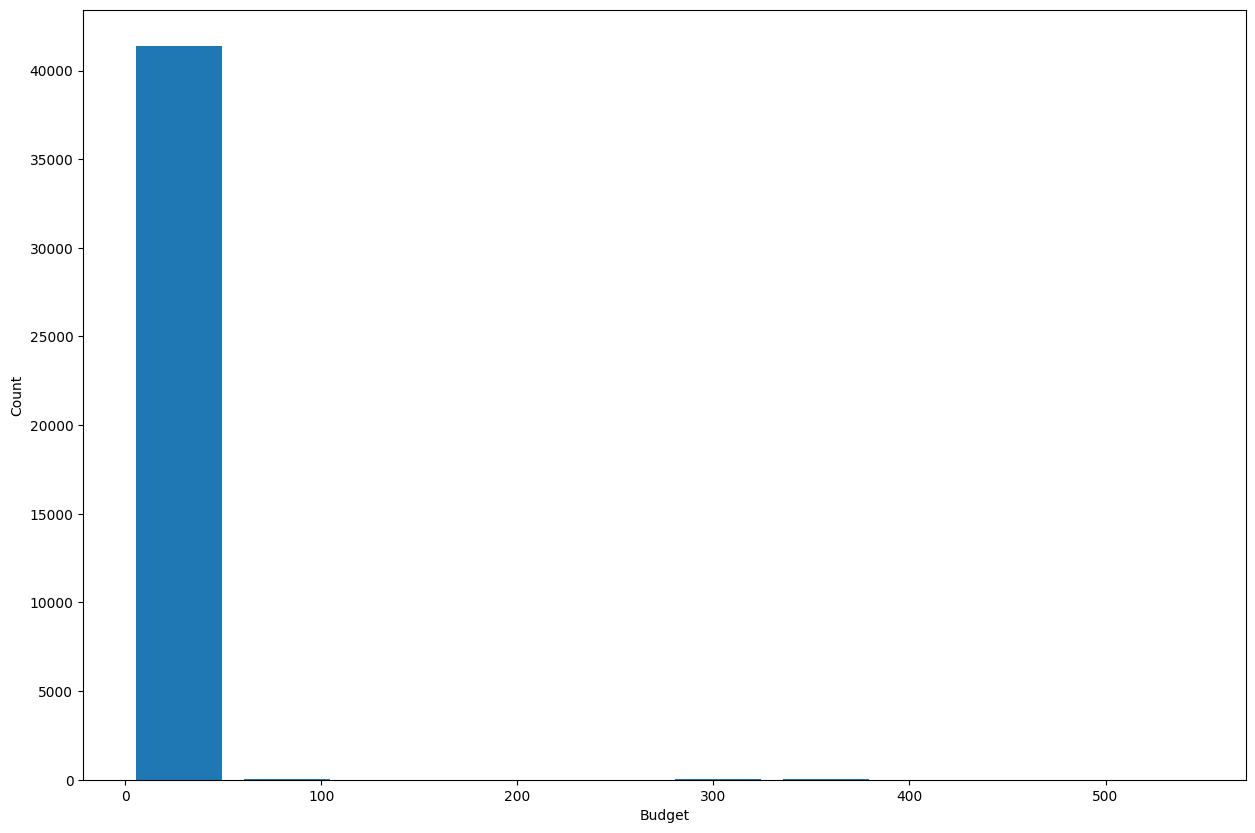

In [41]:
plt.rcParams['figure.figsize']=(15,10)
plt.hist(df2.lease,rwidth=.8)
plt.xlabel('Budget', fontsize=10)
plt.ylabel('Count', fontsize=10)

In [53]:
df2['lease']=df2['lease'].apply(lambda x: x if x<=150 else(None))

<ipython-input-53-1c00ed9113d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['lease']=df2['lease'].apply(lambda x: x if x<=150 else(None))


In [42]:
df2['lease']=df2['lease'].apply(lambda x: x if x<=60 else(None))

In [43]:
data['lease']=df2['lease']

In [44]:
data.isnull().sum()

Unnamed: 0       0
status         291
budget        4279
lease         5233
dtype: int64

In [45]:
data.head(20)

,Unnamed: 0,status,budget,lease
0,0,LOST,NaN,NaN
1,1,LOST,NaN,NaN
2,2,LOST,150.0,44.0
3,3,LOST,0.0,0.0
4,4,LOST,NaN,NaN
5,5,LOST,120.0,24.0
6,6,LOST,0.0,0.0
7,7,LOST,210.0,51.0
8,8,LOST,100.0,24.0
9,9,LOST,270.0,51.0


In [46]:
data.shape

(46608, 4)

### Converting "9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0" to None

In [234]:
data1=data

In [240]:
for i in ['source', 'source_city', 'source_country', 'utm_source', 'utm_medium', 'des_city', 'des_city', 'des_country']:
              data1[i]=data[i].apply(lambda x: None if x != None and len(x)<60 else(None))


In [241]:
data1

,Unnamed: 0,status,budget,lease,source,source_city,source_country,utm_source,utm_medium,des_city,des_country
0,0,LOST,None,None,None,None,None,None,None,None,None
1,1,LOST,None,None,None,None,None,None,None,None,None
2,2,LOST,0 to 150 Euros per week,Full Year Stay,None,None,None,None,None,None,None
3,3,LOST,0 to 150 Euros per week,Short Stay,None,None,None,None,None,None,None
4,4,LOST,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
46603,46603,LOST,0 to 150 Euros per week,Full Year Stay,None,None,None,None,None,None,None
46604,46604,LOST,0 to 150 Euros per week,Short Stay,None,None,None,None,None,None,None
46605,46605,LOST,101 to 300 Euros per week,Full Year Stay,None,None,None,None,None,None,None
46606,46606,LOST,None,Full Year Stay,None,None,None,None,None,None,None


In [242]:
data=data1

## Handling Null Value

In [47]:
data=data.dropna()

# Model Building

In [48]:
data.head()

,Unnamed: 0,status,budget,lease
2,2,LOST,150.0,44.0
3,3,LOST,0.0,0.0
5,5,LOST,120.0,24.0
6,6,LOST,0.0,0.0
7,7,LOST,210.0,51.0


In [49]:
data=data.drop(['Unnamed: 0'], axis=1)

In [50]:
data.shape

(39210, 3)

## Separating Lables and Features into two different DataFrames named X and Y

In [51]:
Y=data['status']
Y=pd.DataFrame(Y)
Y

,status
2,LOST
3,LOST
5,LOST
6,LOST
7,LOST
...,...
46600,LOST
46603,LOST
46604,LOST
46605,LOST


In [52]:
Y.nunique()

status    2
dtype: int64

In [53]:
X=data.drop(['status'],axis=1)
X

,budget,lease
2,150.0,44.0
3,0.0,0.0
5,120.0,24.0
6,0.0,0.0
7,210.0,51.0
...,...,...
46600,0.0,0.0
46603,90.0,52.0
46604,90.0,12.0
46605,270.0,44.0


In [54]:
X.shape

(39210, 2)

In [81]:
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, GridSearchCV


## Seprating the dataset into train and test data

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=10)

In [63]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.02040816326530612, penalty='l1', solver='liblinear')
LR.fit(X_train , Y_train)
LR.score(X_test,Y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9266768681458811

**HyperParameter Tuning**

In [61]:
grid_params = { 'solver' :  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
               'C' : np.linspace(0,1,50)}
gs=GridSearchCV(LogisticRegression(),grid_params,cv=cv, return_train_score=False)
gs.fit(X,Y)
p1=gs.best_params_
p1

Streaming output truncated to the last 5000 lines.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validat

{'C': 0.02040816326530612, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
s1=gs.best_score_
s1

0.9661538461538461

In [76]:
samplex_test=pd.DataFrame({'budget':[150], 'lease':[50]})

## Predict Result

In [77]:
LR.predict(samplex_test)

array(['LOST'], dtype=object)

In [97]:
LR.predict_proba(samplex_test)[0][1]

0.09600187443590151

In [79]:
Y_pred=LR.predict(X_test)

In [93]:
LR.predict_proba(X_test)[1]

array([[0.90168328, 0.09831672],
       [0.95440436, 0.04559564],
       [0.90100633, 0.09899367],
       ...,
       [0.90399813, 0.09600187],
       [0.91688843, 0.08311157],
       [0.91688843, 0.08311157]])

##check accuracy

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [86]:
confusion_matrix(Y_test, Y_pred)

array([[7267,    0],
       [ 575,    0]])

In [87]:
accuracy_score(Y_test, Y_pred)

0.9266768681458811

In [89]:
f1_score(Y_test, Y_pred, average='micro')

0.9266768681458811

**CROSS VALIDATION**

In [ ]:
cv=ShuffleSplit(n_splits=5,test_size=.3,random_state=10)
cross_val_score(LogisticRegression(C=0.02040816326530612, penalty='l1', solver='liblinear'),X,Y,cv=cv)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

array([0.9275695 , 0.92144861, 0.92331888, 0.92722945, 0.92314886])

# Predict LeadScore

In [102]:
def predict_score(budget, lease):
  input=pd.DataFrame({'budget':[int(budget)], 'lease':[int(lease)]})
  res=(LR.predict_proba(input)[0][1])*100
  return res

In [105]:
predict_score(500, 12)

1.171147750203585